**Install Dependencies for running ollama on colab:**

In [1]:
!sudo apt-get install -y pciutils
!curl -fsSL https://ollama.com/install.sh | sh # download ollama api
from IPython.display import clear_output

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpci3 pci.ids
The following NEW packages will be installed:
  libpci3 pci.ids pciutils
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 343 kB of archives.
After this operation, 1,581 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 pci.ids all 0.0~2022.01.22-1 [251 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libpci3 amd64 1:3.7.0-6 [28.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 pciutils amd64 1:3.7.0-6 [63.6 kB]
Fetched 343 kB in 1s (634 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 3.)
debconf: falling back to frontend: Readline
debconf: unable to initializ

**Running olaama foe models:**

In [2]:
import os
import threading
import subprocess
import requests
import json
def ollama():
    os.environ['OLLAMA_HOST'] = '0.0.0.0:11434'
    os.environ['OLLAMA_ORIGINS'] = '*'
    subprocess.Popen(["ollama", "serve"])

ollama_thread = threading.Thread(target=ollama)
ollama_thread.start()



**pull qwen2.5-coder:7b using ollama pull command:**

In [3]:
from IPython.display import clear_output
# !ollama pull llama3.1:8b
# !ollama pull venetanji/llama3.2-tool
!ollama pull qwen2.5-coder:7b
clear_output()

In [ ]:
"Determine if the query is about esop realted or web based, and route the query accordingly."

**Install dependencies for swarm franework**

In [4]:
!pip install openai
!pip install git+https://github.com/openai/swarm.git

  Cloning https://github.com/openai/swarm.git to /tmp/pip-req-build-vh8dl42t
  Running command git clone --filter=blob:none --quiet https://github.com/openai/swarm.git /tmp/pip-req-build-vh8dl42t
  Resolved https://github.com/openai/swarm.git to commit 9db581cecaacea0d46a933d6453c312b034dbf47
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.7/218.7 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 33.5 MB/s eta 0:00:00
  Created wheel for swarm: filename=swarm-0.1.0-py3-none-any.whl size=26001 sha256=ac44d93ad2db6

**calling local downloded qwen 2.5-coder:7b for infrencing in open ai client**

In [5]:
import openai
from google.colab import userdata

# model = "mixtral-8x7b-32768"
#model = "llama-3.1-70b-versatile"
#model = "llama-3.2-90b-text-preview"

# model = "llama3-groq-70b-8192-tool-use-preview"

# # groq Client
# llm_client = openai.OpenAI(
#   base_url="https://api.groq.com/openai/v1",
#   api_key=userdata.get('GROQ_API_KEY'),
# )

model="qwen2.5-coder:7b"
# model="venetanji/llama3.2-tool"
# ollama local client
ollama_client = openai.OpenAI(
    base_url="http://localhost:11434/v1",
    api_key="ollama"
)


In [6]:
from swarm import Swarm, Agent

swarm_client = Swarm(client=ollama_client)

agent = Agent(
    name="Agent",
    instructions="You are a helpful agent.",
    model=model,
    tool_choice="auto"
)

messages = [{"role": "user", "content": "Hi!"}]
response = swarm_client.run(agent=agent, messages=messages)

print(response.messages[-1]["content"])


Hello there! How can I assist you today?


**Creating Diffrent RAg agent that take user query and give answer from database and web search**

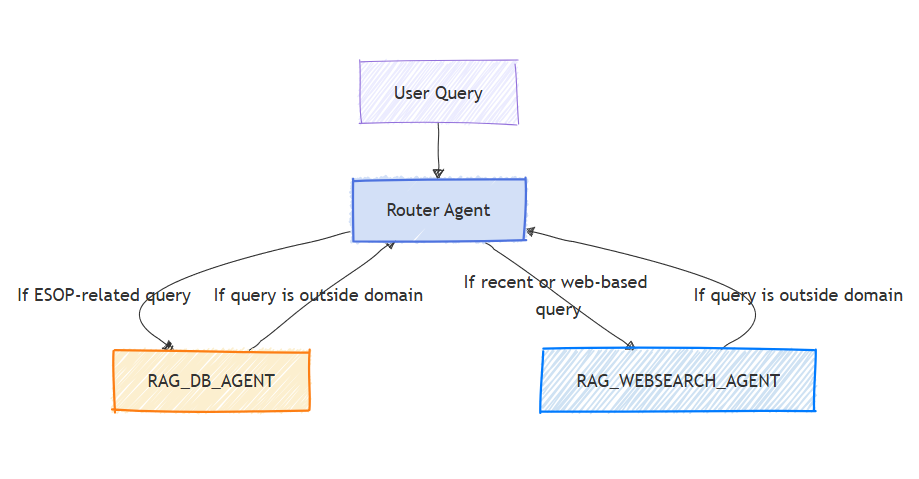


This system comprises three main agents, each designed to handle specific types of queries, with a Router Agent coordinating the workflow:

**Router Agent:**

Purpose: Acts as the central decision-maker, determining the appropriate agent to handle each user query.
Functionality: If a query is ESOP-related, it routes to RAG_DB_AGENT; if it's a recent or web-based query, it routes to RAG_WEBSEARCH_AGENT. For queries outside the scope of a specialized agent, it reroutes them back to itself.

**RAG_DB_AGENT:**

Purpose: Dedicated to ESOP-related queries.
Functionality: Retrieves information from the internal knowledge base and generates responses specific to ESOP topics. If it receives a non-ESOP query, it transfers it back to the Router Agent for re-evaluation.

**RAG_WEBSEARCH_AGENT:**

Purpose: Focuses on answering recent or general queries by performing web searches.

Functionality: Gathers relevant information from web sources to respond to general or time-sensitive queries. If a query falls outside its scope, it returns it to the Router Agent for further routing.

Workflow

*  The Router Agent initially processes all user queries, directing them based on content.
*  RAG_DB_AGENT and RAG_WEBSEARCH_AGENT handle queries within their domains, or return out-of-scope queries back to the Router Agent.

This setup ensures each query is processed efficiently by the most suitable agent, providing accurate and context-specific responses.

In [7]:
!pip -q install langchain langchain-chroma langchain-groq langchain-community pypdf sentence-transformers docx2txt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 kB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.3/409.3 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 87.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [8]:
from langchain_community.document_loaders import PyPDFLoader, Docx2txtLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_core.documents import Document
from typing import List
import os
from langchain_community.embeddings.sentence_transformer import SentenceTransformerEmbeddings
from langchain_chroma import Chroma

embedding_function = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

<ipython-input-8-29fe5be1d8fa>:9: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_function = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in yo

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [9]:
from google.colab import userdata
# Set the Tavily API key
os.environ['TAVILY_API_KEY'] = userdata.get("TAVILY_API_KEY")#replace with your Tavily Api Key
from langchain_community.tools.tavily_search import TavilySearchResults
search__tool=TavilySearchResults(k=3)
def search_tool(question):
  list_=search__tool.run(question)
  return "\n\n".join(doc["content"] for doc in list_)

question="How does exercise price determine for ESOP?"

# context_variables={"query":query}
print(search_tool(question))

To begin with, the exercise price in ESOP is used to determine the amount required to exercise the options and the tax ramifications of doing so. In return for the shares, the employee must pay the strike price multiplied by the number of vested options the employee desires to exercise. The difference between the stock's current Fair Market

To check your ESOP's exercise price, look at your ESOP agreement. Compare the exercise price in the agreement against the fair market value of your company stock. Account for legal restrictions and provisions when comparing. You may also consult the aid of a tax professional to clarify any doubts. Send it to someone who might find it helpful.

Exercise Price 8. Can the Exercise Price of ESOP be less than face value? No. The Company can set Exercise Price below the prevailing market price or at any such discounted price but it cannot be below the face value of the shares. ... Yes, a Company, whether public or private, has to set the exercise price w

In [10]:
import os
from langchain.embeddings import OpenAIEmbeddings  # You can also use other embeddings like HuggingFaceEmbeddings
from langchain.document_loaders import PyPDFLoader, Docx2txtLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma

def pdf_vectorstore(folder_path: str):
    documents = []

    # Load documents from PDF and DOCX files
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if filename.endswith('.pdf'):
            loader = PyPDFLoader(file_path)
        elif filename.endswith('.docx'):
            loader = Docx2txtLoader(file_path)
        else:
            print(f"Unsupported file type: {filename}")
            continue
        documents.extend(loader.load())

    # Split documents into chunks
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
    splits = text_splitter.split_documents(documents)

    # Specify the persist_directory using an absolute path
    persist_directory = os.path.abspath("./chroma_db")
    os.makedirs(persist_directory, exist_ok=True)

    # Initialize the vectorstore
    collection_name = "my_collection"
    vectorstore = Chroma.from_documents(
        collection_name=collection_name,
        documents=splits,
        embedding=embedding_function,
        persist_directory=persist_directory
    )
    print("vectorstore created")
    return vectorstore

# Load documents from a folder
folder_path = "/content/"  # Replace with the actual path to your folder
vectorstore=pdf_vectorstore(folder_path)


Unsupported file type: .config
Unsupported file type: sample_data
vectorstore created


In [11]:
from langchain.vectorstores.base import VectorStoreRetriever
retriever = VectorStoreRetriever(vectorstore=vectorstore)


In [12]:
from google.colab import userdata
import os
os.environ["GROQ_API_KEY"]=userdata.get("GROQ_API_KEY")

In [13]:
from langchain_core.prompts import ChatPromptTemplate
from langchain.schema.runnable import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser
from langchain_groq import ChatGroq

llm = ChatGroq(model="llama-3.2-90b-text-preview")


def retrieve_and_generate(question):

  print("Calling retrieve_and_generate")

  template = """Answer the question based only on the following context:
  {context}
  Question: {question}
  Answer: """

  prompt = ChatPromptTemplate.from_template(template)

  def docs2str(docs):
      return "\n\n".join(doc.page_content for doc in docs)

  rag_chain = (
      {"context": retriever | docs2str, "question": RunnablePassthrough()}
      | prompt
      | llm
      | StrOutputParser()
  )
  response = rag_chain.invoke(question)
  return response

question = "How does exercise price determine for ESOP?"
result = retrieve_and_generate(question)

print(f"Question: {question}")
print(f"Answer: {result}")

Calling retrieve_and_generate
Question: How does exercise price determine for ESOP?
Answer: Companies are free to decide the exercise price, which may be issued at a discount or premium but the exercise price determined by the Company shall not be less than the par value of the shares.


In [14]:


# Initialize the search tool with a parameter k=3 for top results
search__tool = TavilySearchResults(k=3)

def search_tool(question):
    # Get search results using the TavilySearchResults tool
    results = search__tool.run(question)
    # Combine the results into a single string
    return "\n\n".join(doc["content"] for doc in results)

def websearch_and_generate(question):
    print("Calling websearch_and_generate")

    # Define the template with placeholders for context and question
    template = """Answer the question based only on the following context:
    {context}
    Question: {question}
    Answer: """

    # Create a prompt template with placeholders
    prompt = ChatPromptTemplate.from_template(template)

    # Run the search tool to get relevant content
    context_text = search_tool(question)

    # Set up the RAG chain: first format the prompt, then pass it to the llm, then parse the output
    rag_chain = (
        prompt
        | llm
        | StrOutputParser()
    )

    # Invoke the chain with formatted inputs for context and question
    response = rag_chain.invoke({"context": context_text, "question": question})

    return response

# Test question
question = "What is IPL in cricket?"
result = websearch_and_generate(question)

# Print the output
print(f"Question: {question}")
print(f"Answer: {result}")


Calling websearch_and_generate
Question: What is IPL in cricket?
Answer: The IPL (Indian Premier League) is a professional Twenty20 cricket league in India, contested every year by eight teams representing eight different cities in India, featuring the world's best cricketers in a franchise-based competition.


In [28]:
def get_router_agent_instructions():
    return """
    Determine which agent is best suited to handle the user's query,
    and transfer the conversation to that agent.
    Route to RAG_DB_AGENT for ESOP-related queries..
    Route to RAG_WEBSEARCH_AGENT for recent or web-based queries
    """

router_agent = Agent(
    name="Router Agent",
    # instructions=get_router_agent_instructions(),
    instructions="Determine if the query is about esop realted then transfer query to RAG_DB_AGENT otherwise transfer query to RAG_WEBSEARCH_AGENT, and route the query accordingly.",
    model=model,
    tool_choice="auto"

)

RAG_DB_AGENT = Agent(
    name="RAG_DB_AGENT",
    instructions="Retrieve relevant information from the knowledge base and generate responses to ESOP-related queries.",
    functions=[retrieve_and_generate],
    model=model,
    tool_choice="auto"
)

RAG_WEBSEARCH_AGENT = Agent(
    name="RAG_WEBSEARCH_AGENT",
    instructions="Retrieve relevant information from web search and generate responses to general or recent queries.",
    functions=[websearch_and_generate],
    model=model,
    tool_choice="auto"
)

# Transfer Functions
def transfer_back_to_router_agent(**kwargs):
    """Route back to the Router Agent if the query is outside the current agent's domain."""
    return router_agent

def transfer_to_RAG_WEBSEARCH_AGENT(**kwargs):
    """Route to RAG_WEBSEARCH_AGENT for recent or web-based queries."""
    return RAG_WEBSEARCH_AGENT

def transfer_to_RAG_DB_AGENT(**kwargs):
    """Route to RAG_DB_AGENT for ESOP-related queries."""
    return RAG_DB_AGENT

# Assign routing functions
router_agent.functions = [transfer_to_RAG_DB_AGENT, transfer_to_RAG_WEBSEARCH_AGENT]
RAG_WEBSEARCH_AGENT.functions.append(transfer_back_to_router_agent)
RAG_DB_AGENT.functions.append(transfer_back_to_router_agent)


In [16]:
router_agent

Agent(name='Router Agent', model='qwen2.5-coder:7b', instructions="\n    Determine which agent is best suited to handle the user's query,\n    and transfer the conversation to that agent.\n    Route to RAG_DB_AGENT for ESOP-related queries..\n    Route to RAG_WEBSEARCH_AGENT for recent or web-based queries\n    ", functions=[<function transfer_to_RAG_DB_AGENT at 0x79f570a90f70>, <function transfer_to_RAG_WEBSEARCH_AGENT at 0x79f570a91000>], tool_choice='auto', parallel_tool_calls=True)

**For streamimg the swram client**

In [25]:
client = Swarm(client=ollama_client)

In [26]:

messages = [{"role": "user", "content": "what is ipl stand for in cricket"}]
response = client.run(agent=router_agent, messages=messages)
if isinstance(response, Agent):
    selected_agent = response
    result = selected_agent.functions
    print(result)
else:
    print(response.messages[-1]["content"])

Calling websearch_and_generate
<response>
IPL stands for Indian Premier League, which is the highest-level professional cricket league in India. It's a Twenty20 cricket league that is played annually.
</response>


In [29]:
response.messages

[{'content': '',
  'refusal': None,
  'role': 'assistant',
  'audio': None,
  'function_call': None,
  'tool_calls': [{'id': 'call_fslntvi1',
    'function': {'arguments': '{"kwargs":"What is IPL stand for in cricket"}',
     'name': 'transfer_to_RAG_WEBSEARCH_AGENT'},
    'type': 'function'}],
  'sender': 'Router Agent'},
 {'role': 'tool',
  'tool_call_id': 'call_fslntvi1',
  'tool_name': 'transfer_to_RAG_WEBSEARCH_AGENT',
  'content': '{"assistant": "RAG_WEBSEARCH_AGENT"}'},
 {'content': '',
  'refusal': None,
  'role': 'assistant',
  'audio': None,
  'function_call': None,
  'tool_calls': [{'id': 'call_i9k1ti12',
    'function': {'arguments': '{"question":"What is IPL stand for in cricket?"}',
     'name': 'websearch_and_generate'},
    'type': 'function'}],
  'sender': 'RAG_WEBSEARCH_AGENT'},
 {'role': 'tool',
  'tool_call_id': 'call_i9k1ti12',
  'tool_name': 'websearch_and_generate',
  'content': 'IPL stands for Indian Premier League.'},
 {'content': "<response>\nIPL stands for In

In [33]:
messages.append({"role": "user", "content": input()})

response = client.run(
    agent=router_agent,
    messages=messages,

)
if isinstance(response, Agent):
    selected_agent = response
    result = selected_agent.functions
    print(result)
else:
    print(response.messages[-1]["content"])

 How does exercise price determine for ESOP?
<|im_start|> <response>
The exercise price, also known as the strike price, in an Employee Stock Ownership Plan (ESOP) is typically determined based on certain key factors:

1. **Fair Market Value (FMV):** The FMV of the company's stock on a specific date is used as the benchmark for setting the exercise price.

2. **Initial Grant Date:** When an employee is initially granted ESOP shares, the exercise price is usually set as or above the FMV of the stock on that date.

3. **Annual Adjustments:** To guard against dilution and market fluctuation, some ESOP plans include provisions for annual adjustments to the exercise price based on certain events, such as stock splits, dividends, or significant corporate transactions.

4. **Plan Terms:** Each ESOP plan will specify its own rules regarding when and how the exercise price is set, which can vary between companies.

To find detailed information about an employee's specific ESOP, they should refe

IPL stands for Indian Premier League, which is the premier limited-overs cricket league in India.

Regarding exercise price determination for ESOP (Employee Stock Option Plan), it is typically determined based on a specified date. This can be the grant date of the option, or another date as per the company's policy and regulatory requirements. The purpose of this date is to create an equity-linked incentive that provides an opportunity for employees to acquire shares at a predetermined price, with the value potentially increasing over time if the underlying stock price rises after the granting date.


In [34]:
response.messages

[{'content': '',
  'refusal': None,
  'role': 'assistant',
  'audio': None,
  'function_call': None,
  'tool_calls': [{'id': 'call_c0iiervf',
    'function': {'arguments': '{"kwargs":"what is ipl stand for in cricket"}',
     'name': 'transfer_to_RAG_WEBSEARCH_AGENT'},
    'type': 'function'},
   {'id': 'call_dkzduzhv',
    'function': {'arguments': '{"kwargs":"how does exercise price determine for ESOP"}',
     'name': 'transfer_to_RAG_DB_AGENT'},
    'type': 'function'},
   {'id': 'call_3i65sr6z',
    'function': {'arguments': '{"kwargs":"how does exercise price determine for ESOP"}',
     'name': 'transfer_to_RAG_DB_AGENT'},
    'type': 'function'}],
  'sender': 'Router Agent'},
 {'role': 'tool',
  'tool_call_id': 'call_c0iiervf',
  'tool_name': 'transfer_to_RAG_WEBSEARCH_AGENT',
  'content': '{"assistant": "RAG_WEBSEARCH_AGENT"}'},
 {'role': 'tool',
  'tool_call_id': 'call_dkzduzhv',
  'tool_name': 'transfer_to_RAG_DB_AGENT',
  'content': '{"assistant": "RAG_DB_AGENT"}'},
 {'role':

In [ ]:
messages.append({"role": "user", "content": input()})

response = client.run(
    agent=router_agent,
    messages=messages,

)

who is prim minitser of india
Calling websearch_and_generate
Calling websearch_and_generate
Calling websearch_and_generate


In [ ]:
response.messages

[{'content': '',
  'refusal': None,
  'role': 'assistant',
  'audio': None,
  'function_call': None,
  'tool_calls': [{'id': 'call_dsdq24gc',
    'function': {'arguments': '{"kwargs":"who is current president of america"}',
     'name': 'transfer_to_RAG_WEBSEARCH_AGENT'},
    'type': 'function'}],
  'sender': 'Router Agent'},
 {'role': 'tool',
  'tool_call_id': 'call_dsdq24gc',
  'tool_name': 'transfer_to_RAG_WEBSEARCH_AGENT',
  'content': '{"assistant": "RAG_WEBSEARCH_AGENT"}'},
 {'content': '',
  'refusal': None,
  'role': 'assistant',
  'audio': None,
  'function_call': None,
  'tool_calls': [{'id': 'call_opxcp9uz',
    'function': {'arguments': '{"question":"Who is the current president of America, what are the exercises in an ESOP, and who is the prime minister of India?"}',
     'name': 'websearch_and_generate'},
    'type': 'function'}],
  'sender': 'RAG_WEBSEARCH_AGENT'},
 {'role': 'tool',
  'tool_call_id': 'call_opxcp9uz',
  'tool_name': 'websearch_and_generate',
  'content': 